In [1]:
#Gerard i Roger
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv('attacks.csv', encoding='ISO-8859-1')

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
#Mostrem els 20 primers camps del df

In [6]:
df.head(20)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0


In [7]:
#Mostrem la longitud del df

In [8]:
len(df)

25723

In [9]:
#Mostrem els tipus de dades de les cols del df

In [10]:
df.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
dtype: object

In [11]:
#Sobrescribim el nom a les columnes amb un diferent

In [12]:
df.columns = ['Numero','Data','Any','Tipus','Pais','Area', 'Localització','Activitat','Nom','Sexe' ,'Edat','Lessió','Fatal (S/N)','hora','Especies','Investigador','pdf','href formula','href','Numero1','Numero2','ordre original']

In [13]:
#Printem els paisos del df

In [14]:
print(df.Pais)

0              USA
1              USA
2              USA
3        AUSTRALIA
4           MEXICO
           ...    
25718          NaN
25719          NaN
25720          NaN
25721          NaN
25722          NaN
Name: Pais, Length: 25723, dtype: object


In [15]:
#Omplim els camps NAN de la columna amb desconegut per evitar errades ademes, ademés de crear un arry on guardarem els paisos que començen per A

In [16]:
df['Pais'] = df['Pais'].fillna('Desconegut')

Country_starts_a = df['Pais'].str.startswith('A')

In [17]:
#Fem un set del array i el mostrem per pantalla

In [18]:
set(df.Pais[Country_starts_a])

{'ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANDAMAN ISLANDS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ASIA?',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES'}

In [19]:
#Els atacs de taurons registrats a 2018 es guardaran i mostraran els 5 primers, ademes els camps NaN s'omplen com a "desconegut"

In [20]:
Date_attack = df['Data'].str.contains('2018', na=False)

In [21]:
df['Data'] = df['Data'].fillna('Desconegut')
df.loc[Date_attack].head()

,Numero,Data,Any,Tipus,Pais,Area,Localització,Activitat,Nom,Sexe,...,Fatal (S/N),hora,Especies,Investigador,pdf,href formula,href,Numero1,Numero2,ordre original
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [22]:
#Guardem l'especie tauro blanc i mostrem les 5 primeres, ademés de omplir com a desconegut els camps NaN

In [23]:
WhiteSharks = df.Especies.str.contains('White shark', na=False)

In [24]:
df['Data'] = df['Data'].fillna('Desconegut')
df.loc[WhiteSharks].head()

,Numero,Data,Any,Tipus,Pais,Area,Localització,Activitat,Nom,Sexe,...,Fatal (S/N),hora,Especies,Investigador,pdf,href formula,href,Numero1,Numero2,ordre original
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
22,2018.04.24,24-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"South Point, Gracetown",Surfing,Nathan Burch,M,...,N,Afternoon,"White shark, 3.5 m","B. Myatt, GSAF",2018.04.24-Burch.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.24,2018.04.24,6281.0
24,2018.04.22,22-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Robberg Beach, Plettenberg Bay",Paddle-skiing,male,M,...,N,09h40,"White shark, 2.5 m","Africa News Agency, 4/22/2018",2018.04.22-PlettenbergBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.22,2018.04.22,6279.0
34,2018.04.03,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,...,N,15h00,White shark,"K. McMurray, TrackingSharks.com",2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.02,2018.04.03,6269.0
50,2018.01.13,13-Jan-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Martin Islet,Free diving,Callum Stewart,M,...,N,NaN,"White shark, 3.5 m","B. Myatt, GSAF",2018.01.13-Stewart.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.13,2018.01.13,6253.0


In [25]:
#Guardem en un array el investigador del atac ademés de mostrar les 5 primeres files d'aquest

In [26]:
Instigator_attack= df.Investigador.str.contains('B. Myatt', na=False)

In [27]:
df.loc[Instigator_attack].head()

,Numero,Data,Any,Tipus,Pais,Area,Localització,Activitat,Nom,Sexe,...,Fatal (S/N),hora,Especies,Investigador,pdf,href formula,href,Numero1,Numero2,ordre original
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
16,2018.05.09,09-May-2018,2018.0,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,...,N,10h30,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,6287.0
19,2018.04.28.a,28-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,Gearys Beach,Surfing,Adam Murray,M,...,N,16h50,NaN,"B. Myatt, GSAF",2018.04.28.a-Murray.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.28.a,2018.04.28.a,6284.0
20,2018.04.25.b,25-Apr-2018,2018.0,Questionable,AUSTRALIA,New South Wales,Lennox Head,Surfing,Matthew Lee,M,...,N,07h00,Questionable,"B. Myatt, GSAF",2018.04.25.b-Lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.25.b,2018.04.25.b,6283.0
22,2018.04.24,24-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"South Point, Gracetown",Surfing,Nathan Burch,M,...,N,Afternoon,"White shark, 3.5 m","B. Myatt, GSAF",2018.04.24-Burch.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.24,2018.04.24,6281.0


In [28]:
#Fem un array on es guardin les especies de taurons de 6 metres ademes d'una grafica on les especies de taurons

In [29]:
WhiteShark= df.Especies.str.contains('White shark', na=False)

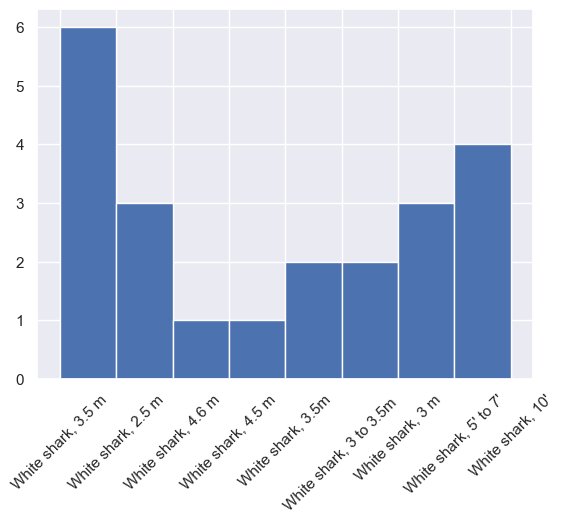

In [30]:
bin_sizes, _, _ = plt.hist(df.Especies[WhiteShark], bins=range(1, 10))
plt.xticks(rotation=45)
plt.show()

In [31]:
#Fa un set de les especies de tauro que siguin blancs

In [32]:
set(df.Especies[WhiteSharks])

{' White shark',
 " White shark, 7' ",
 "Alleged to involve a White shark, 7.6 m [25'] ",
 "Reported to involve a White shark, 6 m to 7m [20' to 23'] ",
 'White shark',
 'White shark (identified by Dr. Hugh Smith) ',
 'White shark (tooth fragment recovered)',
 'White shark (tooth fragments recovered from hull of boat)',
 'White shark (tooth fragments recovered)',
 "White shark 4.9 m [16'] ",
 'White shark according to tooth pattern and witnesses',
 'White shark named \x93Spotty\x94',
 'White shark or bronze whaler',
 'White shark or oceanic whitetip shark',
 'White shark or thresher shark',
 'White shark tooth fragment recovered from ankle & identified by Dr. W. I. Follett',
 'White shark x 2',
 'White shark, 1,900-lb ',
 "White shark, 1.5 m [5'] k",
 "White shark, 1.7 m [5.5']",
 "White shark, 1.8 m [6'] ",
 "White shark, 1.8 m to 2.1 m [6' to 7']  according to Shreuder and a witness",
 "White shark, 10 '",
 "White shark, 10'",
 "White shark, 10' to 12'",
 "White shark, 10' to 12' ",


In [33]:
#Fem una grafica de accidents segons tamany dels taurons blancs

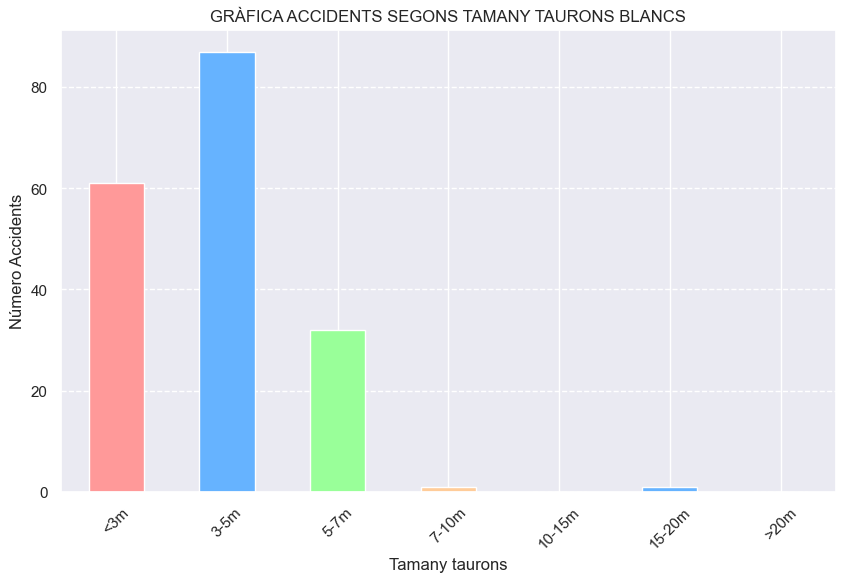

In [34]:
df_cleaned = df.dropna(subset=['Especies'])

white_sharks = df_cleaned[df_cleaned['Especies'].str.contains('White shark', case=False)]

sizes = []
for entry in white_sharks['Especies']:
    matches = re.findall(r'(\d+.?\d)\s(m|)', entry)
    for match in matches:
        if match[1] == 'm':
            sizes.append(float(match[0]))
        elif match[1] == '':
            sizes.append(float(match[0]) * 0.3048)

sizes_df = pd.DataFrame(sizes, columns=['Size_m'])

bins = [0, 3, 5, 7, 10, 15, 20, 30]
labels = ['<3m', '3-5m', '5-7m', '7-10m', '10-15m', '15-20m', '>20m']
sizes_df['Size_Category'] = pd.cut(sizes_df['Size_m'], bins=bins, labels=labels, right=False)

size_counts = sizes_df['Size_Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
size_counts.plot(kind='bar', color=colors)
plt.title('GRÀFICA ACCIDENTS SEGONS TAMANY TAURONS BLANCS')
plt.xlabel('Tamany taurons')
plt.ylabel('Número Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


In [35]:
#Num atacs segun areas d'atac d'Australia

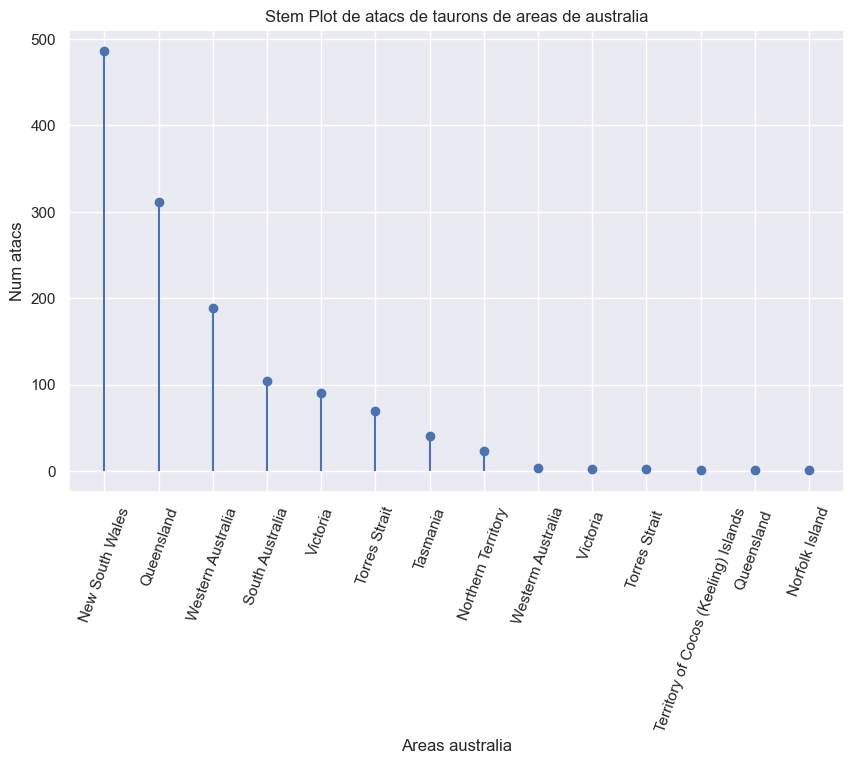

In [36]:
df_cleaned = df.dropna(subset=['Pais'])
australia_country = df_cleaned[df_cleaned['Pais'].str.contains('AUSTRALIA', case=False)]

areasAustralia = australia_country['Area']
numAtacs = areasAustralia.value_counts()

num_atacs_df = numAtacs.reset_index()
num_atacs_df.columns = ['Area', 'NumAtacs']
plt.figure(figsize=(10, 6))
plt.stem(num_atacs_df['Area'], num_atacs_df['NumAtacs'], linefmt='C0-', markerfmt='o', basefmt=' ')
plt.xlabel('Areas australia')
plt.ylabel('Num atacs')
plt.title('Stem Plot de atacs de taurons de areas de australia')
plt.grid(True)
plt.xticks(rotation=70)
plt.show()

In [37]:
#Distribucións d'accidents per paisos

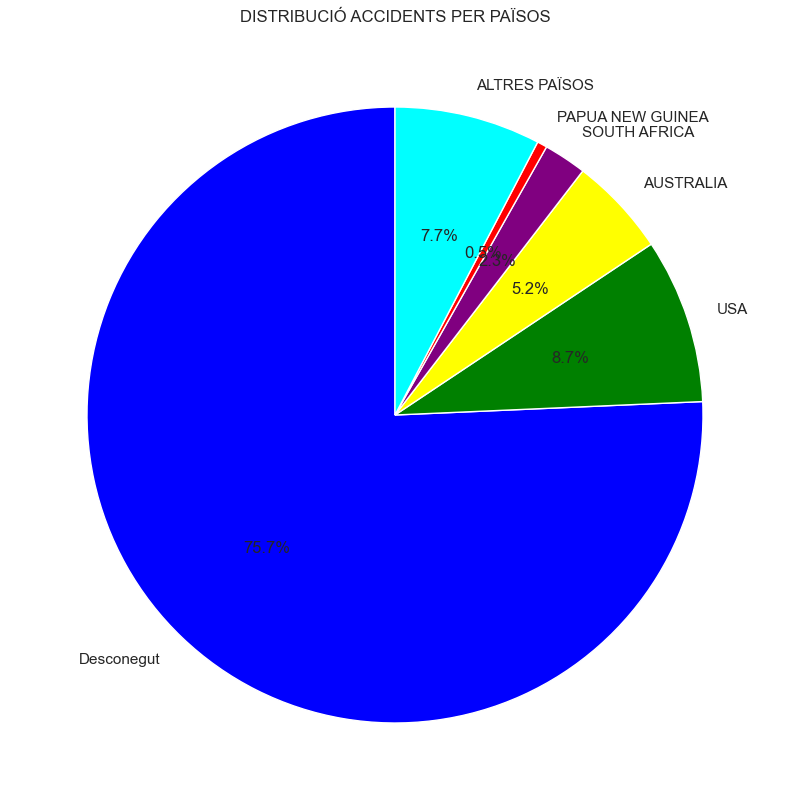

In [38]:
COUNT_PAISOS = df_cleaned['Pais'].value_counts()

TOP_5_PAISOS = COUNT_PAISOS[:5]

ALTRES_PAISOS = COUNT_PAISOS[5:].sum()
TOP_5_PAISOS['ALTRES PAÏSOS'] = ALTRES_PAISOS

colors = ['blue', 'green', 'yellow', 'purple', 'red', 'cyan']

plt.figure(figsize=(10, 10))
plt.pie(TOP_5_PAISOS, labels=TOP_5_PAISOS.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('DISTRIBUCIÓ ACCIDENTS PER PAÏSOS')
plt.show()

In [39]:
#Grafica dels mesos per any on mes accidents han passat

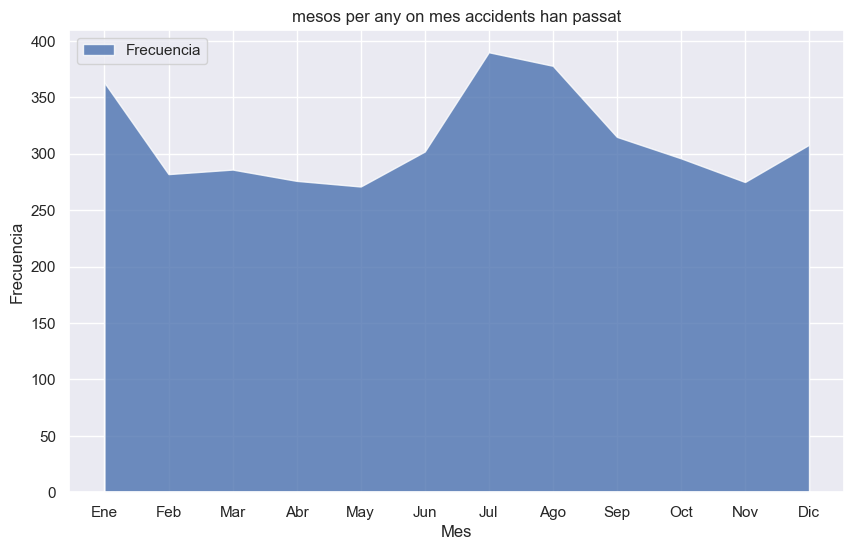

In [51]:
df['Data'] = df['Numero'].str[:10]
df['Data'] = pd.to_datetime(df['Numero'], format='%Y.%m.%d', errors='coerce')

df['mes'] = df['Data'].dt.month

vegades_per_mes = df['mes'].value_counts().sort_index()

mesos = vegades_per_mes.index
frecuencia = vegades_per_mes.values

plt.figure(figsize=(10, 6))
plt.stackplot(mesos, [frecuencia], labels=['Frecuencia'], alpha=0.8)

plt.title('mesos per any on mes accidents han passat')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(loc='upper left')

plt.show()